Inciso a)

Una distribucion de Bernoulli tiene una variable aleatoria que cuenta con $Exito$ o $Fracaso$, mientras que una distribucion Binomial es repetir una muestra de Bernoulli n cantidad de veces. Por lo tanto una distribucion binomial pose dos parametros:
$p$ que indica la propabilidad de exito y $n$ que indica la cantidad de repeticiones de la muestra.

In [1]:
from random import random 
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import binom 
# Puedo usar la funcion binomial de scipy

In [59]:
v_Bin = np.random.binomial(10, 0.4, 100)
# generamos 100 valores que siguen una distribucion binomial

In [4]:
len(v_Bin)
# La lista de elementos nos debe dar el numero N

100

Text(0, 0.5, 'Frecuencia')

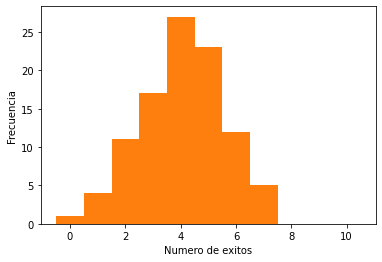

In [60]:
# Hago el histograma
plt.hist(v_Bin, bins = [i -.5 for i in range(12)] )
Conteo = np.array(plt.hist(v_Bin, bins = [i -.5 for i in range(12)] )[0])
plt.xlabel('Numero de exitos')
plt.ylabel('Frecuencia')

In [52]:
a = np.array(v_Bin)
counts = np.unique(a, return_counts=True)
print(counts[1])

[ 7 14 19 25 18 15  2]


In [48]:
v_Binarray = np.array(v_Bin)
data[v_Binarray].value_counts()[:20]

TypeError: only integer scalar arrays can be converted to a scalar index

In [74]:
np.histogram(v_Bin)[0] 

array([ 1,  4, 11,  0, 17, 27,  0, 23, 12,  5], dtype=int32)

In [61]:
Conteo
# Nos da la frecuencia de cada exito, en orden seria 0, 1, 2, 3, 4, 5, 6, ,8, 9, 10
# Notar que para 0 y 10 la frecuencia es nula, con un numero mayor esto puede cambiar

array([ 1.,  4., 11., 17., 27., 23., 12.,  5.,  0.,  0.,  0.])

Text(0, 0.5, 'Frecuencia Relativa')

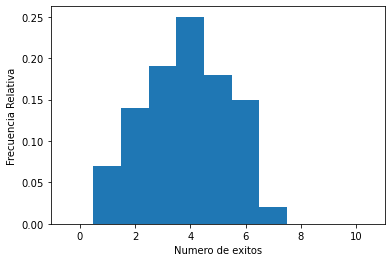

In [10]:
Frec = plt.hist(v_Bin, density = True, bins = [i -.5 for i in range(12)])
plt.xlabel('Numero de exitos')
plt.ylabel('Frecuencia Relativa')
# Frec [0] nos da la frecuencia relativa de cada exito

Creo la distribucion binomial teorica

r	p(r)
0	0.0060466176
1	0.04031078400000004
2	0.12093235199999994
3	0.21499084800000012
4	0.2508226560000002
5	0.20065812480000034
6	0.11147673600000013
7	0.04246732800000004
8	0.010616832
9	0.0015728640000000028
10	0.00010485760000000014
Media = 4.0
Varianza = 2.4


<BarContainer object of 11 artists>

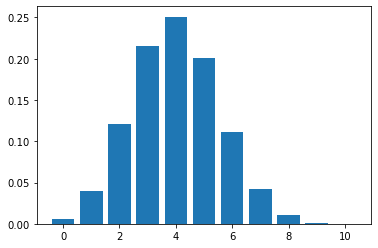

In [11]:
        n = 10
        p = 0.4
        # defino los valores de r, es el numero de exitos (de 0 a 10), seria k
        r_values = list(range(n + 1)) 
        # Asi llega hasta 10 exitos
        # Obtengo la media y la varianza 
        mu, s = binom.stats(n, p)  
        lista = [binom.pmf(r, n, p) for r in r_values ]  
        print("r\tp(r)") 
        for i in range(n + 1): 
            print(str(r_values[i]) + "\t" + str(lista[i])) 
        #    \t  nos hace un tab horizontal 
        print("Media = "+str(mu)) 
        print("Varianza = "+str(s))
        plt.bar(r_values, lista) 

Esto nos da una tabla de la probabilidad de cada numero de exitos, a diferencia de la empirica, estos valores son teoricos y no me van a cambiar si re ejecuto la funcion 

Inciso b)

El $\chi^2$, la prueba chi-cuadrado pertenece a las llamadas pruebas de bondad de ajuste o contrastes, que tienen el objetivo de decidir si puede aceptarse la hipótesis de que una muestra dada procede de una población con una distribución de probabilidad totalmente especificada en la hipótesis nula, en este caso con la distribucion teorica. El estadístico chi-cuadrado tomará un valor igual a 0 si existe concordancia perfecta entre las frecuencias observadas y las esperadas; por contra, el estadístico tomará un valor grande si existe una gran discrepancia entre estas frecuencias, y consecuentemente se deberá rechazar la hipótesis nula.

In [12]:
from scipy.stats import chi2_contingency 
# Antes debo pasar la frecuencia relativa teorica a un frecuencia absoluta, ==> multiplico por 100

In [13]:
Obs_Teo = np.array(lista)
# Puedo hacer opercaciones si la paso a un array

In [15]:
data = [Conteo[0], (Obs_Teo*100)]
# agrupo en una unica lista los valores de las frecuencias relativas observadas y teoricas

In [75]:
chi2_contingency (data) [0]

4.4146049627005475

Miro en una tabla el chi-cuadrado critico para un dado alpha y grados de libertad ( v = 10), si el estadistico calculado es mayor que el critico, se descarta la hipotesis nula, sino no se puede descartar.

Inciso c)

Para hacer la prueba de hipotesis, uso como estadistico de prueba el chi-cuadrado, simulo N cantidad veces el chi con la varible binomial y la teorica, y hago plot, dado un nivel de confianza, veo si mi estadistico es muy grande o no con los datos simulados del chi-cuadrado.

In [19]:
alpha = 0.05

In [68]:
def Sim_Chi():
        v_Bin = np.random.binomial(10, 0.4, 100)
        Counts = np.array(np.histogram(v_Bin) [0])
        data = [Counts, (Obs_Teo*100)]
        chi2 = chi2_contingency (data) [0]
        return(chi2)

In [69]:
Sim_Chi() 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

No se como calcular las frecuencias para poder obtener el chi-cuadrado en la funcion, puedo usar plt.hist pero me hace tambien el plot del histograma pero no quiero eso